<a href="https://colab.research.google.com/github/lethanhdatphumy/AI-projects/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ambarish_breakhis_path = kagglehub.dataset_download('ambarish/breakhis')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breakhis/Folds.csv
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/README.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/count_files.sh
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/process_db_stat.py
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/fibroadenoma.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/phyllodes_tumor.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/tubular_adenoma.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/adenosis.stat.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/README_B.txt
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-29960CD/200X/SOB_B_A-14-29960CD-200-012.png
/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides

In [ ]:
import numpy as np
import cv2
import random

In [ ]:
def load_and_downscale(img_path):
  img = cv2.imread(img_path)
  img = cv2.resize(img, (1024, 768))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img/255.0

In [ ]:
def extract_random_crops(img, total_crops = 20, sizes = [400, 650]):
    crops = []
    height, width, _ = img.shape
    for _ in range(total_crops):
        size = random.choice(sizes)
        x = random.randint(0, width - size)
        y = random.randint(0, height - size)
        crop = img[y:y+size, x:x+size]
        crop = cv2.resize(crop, (224, 224))
        crops.append(crop)
    return np.array(crops)

In [ ]:
def random_color_augmentation(img, total_augmentation=50):
    augmentations = []
    for _ in range(total_augmentation):
        factor = random.uniform(0.7,1.3)
        augmented = img * factor
        augmented = np.clip(augmented, 0,1)
        augmentations.append(augmented)
    return augmentations

In [ ]:
def preprocess_image(img_path, num_crops =20, crop_size = [400, 650]):
  img = load_and_downscale(img_path)
  crops = extract_random_crops(img, num_crops, crop_size)
  final_augmented = []
  for crop in crops:
    augmented = random_color_augmentation(crop)
    final_augmented.append(augmented)
  return np.array(final_augmented)

In [ ]:
image_path = '/kaggle/input/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/lobular_carcinoma/SOB_M_LC_14-15570/200X/SOB_M_LC-14-15570-200-049.png'
augmented_images = preprocess_image(image_path)
print(augmented_images.shape)


(20, 50, 224, 224, 3)


In [ ]:
first_aug = augmented_images[0][0]

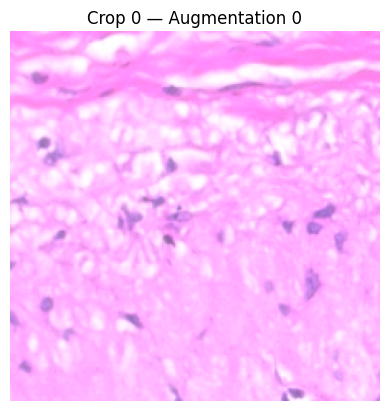

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(first_aug)
plt.title("Crop 0 — Augmentation 0")
plt.axis('off')
plt.show()